             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000
(19, 2)
    Age  SBP
0    60  117
1    61  120
2    74  145
3    57  129
4    63  132
5    68  130
6    66  127
7    77  163
8    63  136
9    54  115
10   63  118
11   76  132
12   60  111
13   61  112
14   65  147
15   79  138
16   69  141
17   56  124
18   62  122


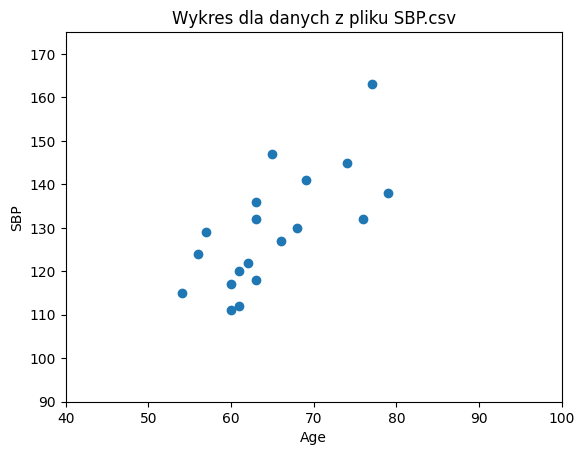

38.210526315789494
[1.26315789]
    Rzeczywiste  Predykowane
0           118   117.789474
1           120   115.263158
2           136   117.789474
3           122   116.526316
4           147   120.315789
5           141   125.368421
6           127   121.578947
7           132   117.789474
8           145   131.684211
9           130   124.105263
10          112   115.263158
11          115   106.421053
12          163   135.473684
13          124   108.947368
14          132   134.210526
15          129   110.210526


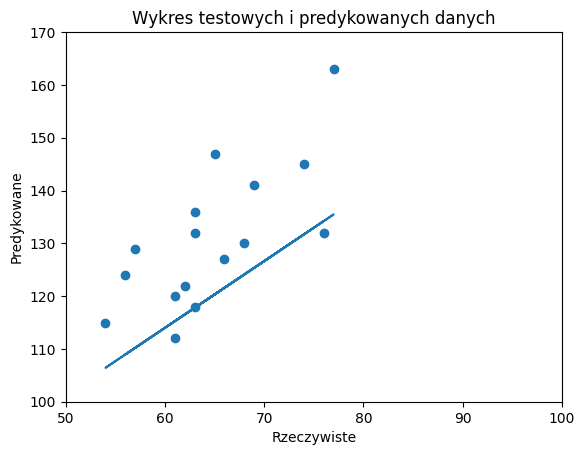

Mean Absolute Error: 11.575657894736842
Mean Squared Error: 200.6438711911358
Root Mean Squared Error: 14.164881615853194


In [16]:
import patsy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split





#Ten sam skrypt tylko dla pliku SBP.csv
df3=pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\laboratorium-lin-model-Matyiashchyk\\SBP.csv")
print(df3.describe(include='all'))
print(df3.shape)
print(df3)
#################################
Age = df3["Age"]
SBP = df3["SBP"]
plt.scatter(Age, SBP)
plt.xlim(40,100)
plt.ylim(90, 175)
plt.xlabel('Age') 
plt.ylabel('SBP') 
plt.title('Wykres dla danych z pliku SBP.csv')
plt.show()
#################################
# Podział danych na treningowe(30%) i testowe. 
X_Wiek = df3.iloc[:, :-1].values 
y_SBP = df3.iloc[:, 1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Wiek, y_SBP, test_size=0.7, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train1, y_train1)

#wartość punktu przecięcia i nachylenia obliczona przez algorytm regresji liniowej dla naszego zestawu danych. 
print(regressor.intercept_)
#Wskaznik uchylenia prostej(współczynnik X). Oznacza to, że na każdą jednostkę zmiany w badanych godzinach zmiana wyniku wynosi około 9,84%
print(regressor.coef_)
###################################
y_pred1 = regressor.predict(X_test1)
df4 = pd.DataFrame({'Rzeczywiste': y_test1, 'Predykowane': y_pred1})
print(df4)

# Twoerzenie wykresu konfrantającego.
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_pred1)
plt.xlim(50, 100)
plt.ylim(100, 170)
plt.xlabel('Rzeczywiste') 
plt.ylabel('Predykowane') 
plt.title('Wykres testowych i predykowanych danych')
plt.show()

# Walidacja danych. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))


In [17]:
# W wyniku widzimy, że uzyskane wyniki nie takie zadawolące w porównaniu do przypadku kiedy używaliśmy nasz algorytm do pliku Score.csv.
#Potwierdzeniem dużych blędów jest wykres oraz dane o błędach(które znacznie większe niż w poprzednim przypadku)
#Nawet jak spróbujemy pokombinować z dzelieniem danych na testowe i treningowe też nie widzimy zadowalających wyników